In [198]:
# https://pythex.org/

# More years data
# UTC vs LST (good discussion topic)
# Look at learned parameters
# Plot on map
# Get elevation

import pandas as pd
import seaborn as sns

from pathlib import Path
from regex import search

In [199]:
# !ls ../Data
data_dir = Path("../Data/weather/")

data_header_filename = data_dir / "HEADERS.txt"
data2020_dirname = data_dir / "2020"

In [200]:
with open(data_header_filename) as data_header_file:
    data_header = [line.split() for line in data_header_file]

all_header_names = data_header[1]
for i, name in enumerate(all_header_names):
    print(f"{i:>2} : {name}")

 0 : WBANNO
 1 : UTC_DATE
 2 : UTC_TIME
 3 : LST_DATE
 4 : LST_TIME
 5 : CRX_VN
 6 : LONGITUDE
 7 : LATITUDE
 8 : T_CALC
 9 : T_HR_AVG
10 : T_MAX
11 : T_MIN
12 : P_CALC
13 : SOLARAD
14 : SOLARAD_FLAG
15 : SOLARAD_MAX
16 : SOLARAD_MAX_FLAG
17 : SOLARAD_MIN
18 : SOLARAD_MIN_FLAG
19 : SUR_TEMP_TYPE
20 : SUR_TEMP
21 : SUR_TEMP_FLAG
22 : SUR_TEMP_MAX
23 : SUR_TEMP_MAX_FLAG
24 : SUR_TEMP_MIN
25 : SUR_TEMP_MIN_FLAG
26 : RH_HR_AVG
27 : RH_HR_AVG_FLAG
28 : SOIL_MOISTURE_5
29 : SOIL_MOISTURE_10
30 : SOIL_MOISTURE_20
31 : SOIL_MOISTURE_50
32 : SOIL_MOISTURE_100
33 : SOIL_TEMP_5
34 : SOIL_TEMP_10
35 : SOIL_TEMP_20
36 : SOIL_TEMP_50
37 : SOIL_TEMP_100


In [297]:
cols_to_keep = [0, 1, 2, 3, 4, 6, 7, 9, 13, 20, 26]
# solar radiation? 13, 14, 15, 16, 17, 18
# infrared surface temperature 19, 20, 21, 22, 23, 24, 25
# relative humidity 26, 27
# soild moisture 28, 29, 30, 31, 32
# soild temperature 33, 34, 35, 36, 37

header_names = [h for i, h in enumerate(all_header_names) if i in cols_to_keep]

# Missing data given as -9999.0 for 7-character fields with one decimal
# and -99.000 for 7-charcter fields with three decimal places

na_values = ["-9999.0", "-99.000"]

count = 0

state_dfs = []
for data_filename in data2020_dirname.glob("*.txt"):
    print("Reading", data_filename.name, end=" ")
    if match := search("^CRNH.*-(\d{4})-([A-Z]+)_([A-Za-z]+).*", data_filename.name):
        year, state, site = match.group(1), match.group(2), match.group(3)
        print(":", year, state, site)
    else:
        print("No match")
        break
        
    if state == "AK" or state == "HI":
        print("****Skipping", state)
        continue

    df = pd.read_csv(
        data_filename,
        names=header_names,
        usecols=cols_to_keep,
        delim_whitespace=True,
        na_values=na_values
    )
    
#     assert df.shape[0] == 366*24, df.shape
    
    df["STATE"] = state
    df["SITE"] = site

    state_dfs.append(df)
    count += 1

Reading CRNH0203-2020-AK_Ruby_44_ESE.txt : 2020 AK Ruby
****Skipping AK
Reading CRNH0203-2020-ND_Jamestown_38_WSW.txt : 2020 ND Jamestown
Reading CRNH0203-2020-IN_Bedford_5_WNW.txt : 2020 IN Bedford
Reading CRNH0203-2020-AK_Selawik_28_E.txt : 2020 AK Selawik
****Skipping AK
Reading CRNH0203-2020-IA_Des_Moines_17_E.txt : 2020 IA Des
Reading CRNH0203-2020-NM_Los_Alamos_13_W.txt : 2020 NM Los
Reading CRNH0203-2020-WY_Moose_1_NNE.txt : 2020 WY Moose
Reading CRNH0203-2020-ID_Murphy_10_W.txt : 2020 ID Murphy
Reading CRNH0203-2020-NM_Socorro_20_N.txt : 2020 NM Socorro
Reading CRNH0203-2020-NC_Asheville_13_S.txt : 2020 NC Asheville
Reading CRNH0203-2020-AK_Cordova_14_ESE.txt : 2020 AK Cordova
****Skipping AK
Reading CRNH0203-2020-AZ_Williams_35_NNW.txt : 2020 AZ Williams
Reading CRNH0203-2020-AK_Bethel_87_WNW.txt : 2020 AK Bethel
****Skipping AK
Reading CRNH0203-2020-NV_Denio_52_WSW.txt : 2020 NV Denio
Reading CRNH0203-2020-AK_Sand_Point_1_ENE.txt : 2020 AK Sand
****Skipping AK
Reading CRNH020

Reading CRNH0203-2020-FL_Titusville_7_E.txt : 2020 FL Titusville
Reading CRNH0203-2020-NH_Durham_2_SSW.txt : 2020 NH Durham
Reading CRNH0203-2020-MN_Goodridge_12_NNW.txt : 2020 MN Goodridge
Reading CRNH0203-2020-AK_Ivotuk_1_NNE.txt : 2020 AK Ivotuk
****Skipping AK
Reading CRNH0203-2020-NM_Las_Cruces_20_N.txt : 2020 NM Las
Reading CRNH0203-2020-ND_Medora_7_E.txt : 2020 ND Medora
Reading CRNH0203-2020-TX_Edinburg_17_NNE.txt : 2020 TX Edinburg
Reading CRNH0203-2020-NV_Mercury_3_SSW.txt : 2020 NV Mercury
Reading CRNH0203-2020-OR_Corvallis_10_SSW.txt : 2020 OR Corvallis
Reading CRNH0203-2020-IL_Shabbona_5_NNE.txt : 2020 IL Shabbona
Reading CRNH0203-2020-AL_Scottsboro_2_NE.txt : 2020 AL Scottsboro
Reading CRNH0203-2020-GA_Watkinsville_5_SSE.txt : 2020 GA Watkinsville
Reading CRNH0203-2020-AZ_Elgin_5_S.txt : 2020 AZ Elgin
Reading CRNH0203-2020-AL_Northport_2_S.txt : 2020 AL Northport
Reading CRNH0203-2020-AK_Tok_70_SE.txt : 2020 AK Tok
****Skipping AK
Reading CRNH0203-2020-MT_Dillon_18_WSW.tx

In [202]:
df.describe()

,WBANNO,UTC_DATE,UTC_TIME,LST_DATE,LST_TIME,LONGITUDE,LATITUDE,T_HR_AVG,P_CALC,SOLARAD,SUR_TEMP,RH_HR_AVG
count,8784.0,8.784000e+03,8784.000000,8.784000e+03,8784.000000,8.784000e+03,8784.00,8751.000000,8677.000000,8784.000000,8781.000000,8776.000000
mean,63856.0,2.020067e+07,1150.000000,2.020066e+07,1150.000000,-8.146000e+01,30.81,20.697200,0.142999,84.492600,22.217299,79.588537
std,0.0,3.596328e+02,692.258061,3.995326e+02,692.258061,1.421166e-14,0.00,7.026316,1.341291,1857.944166,9.210573,15.321241
min,63856.0,2.020010e+07,0.000000,2.019123e+07,0.000000,-8.146000e+01,30.81,-3.100000,0.000000,-99999.000000,-5.200000,22.000000
25%,63856.0,2.020040e+07,575.000000,2.020040e+07,575.000000,-8.146000e+01,30.81,16.700000,0.000000,0.000000,16.700000,71.000000
50%,63856.0,2.020070e+07,1150.000000,2.020070e+07,1150.000000,-8.146000e+01,30.81,22.300000,0.000000,4.000000,22.900000,83.000000
75%,63856.0,2.020100e+07,1725.000000,2.020100e+07,1725.000000,-8.146000e+01,30.81,25.600000,0.000000,208.000000,27.600000,92.000000
max,63856.0,2.021010e+07,2300.000000,2.020123e+07,2300.000000,-8.146000e+01,30.81,34.900000,56.900000,722.000000,46.300000,100.000000


In [203]:
df.head()

,WBANNO,UTC_DATE,UTC_TIME,LST_DATE,LST_TIME,LONGITUDE,LATITUDE,T_HR_AVG,P_CALC,SOLARAD,SUR_TEMP,RH_HR_AVG,STATE,SITE
0,63856,20200101,100,20191231,2000,-81.46,30.81,8.8,0.0,0,6.0,78.0,GA,Brunswick
1,63856,20200101,200,20191231,2100,-81.46,30.81,8.5,0.0,0,5.1,83.0,GA,Brunswick
2,63856,20200101,300,20191231,2200,-81.46,30.81,10.3,0.0,0,6.6,66.0,GA,Brunswick
3,63856,20200101,400,20191231,2300,-81.46,30.81,9.9,0.0,0,6.7,67.0,GA,Brunswick
4,63856,20200101,500,20200101,0,-81.46,30.81,9.8,0.0,0,6.8,66.0,GA,Brunswick


In [204]:
df = pd.concat(state_dfs, ignore_index=True)

In [205]:
df.head()

,WBANNO,UTC_DATE,UTC_TIME,LST_DATE,LST_TIME,LONGITUDE,LATITUDE,T_HR_AVG,P_CALC,SOLARAD,SUR_TEMP,RH_HR_AVG,STATE,SITE
0,54937,20200101,100,20191231,1900,-99.48,46.77,-8.7,0.0,0,-11.5,76.0,ND,Jamestown
1,54937,20200101,200,20191231,2000,-99.48,46.77,-7.6,0.0,0,-9.6,75.0,ND,Jamestown
2,54937,20200101,300,20191231,2100,-99.48,46.77,-6.5,0.0,0,-8.5,75.0,ND,Jamestown
3,54937,20200101,400,20191231,2200,-99.48,46.77,-6.6,0.0,0,-9.7,76.0,ND,Jamestown
4,54937,20200101,500,20191231,2300,-99.48,46.77,-6.2,0.0,0,-9.8,75.0,ND,Jamestown


In [206]:
df.shape, df.shape[0] / 366 / 24
# Some missing rows

((1159488, 14), 132.0)

In [207]:
df["T_HR_AVG"].value_counts(bins=10, ascending=True)

(-35.388, -26.6]       464
(43.0, 51.7]           837
(-26.6, -17.9]        3782
(34.3, 43.0]         12038
(-17.9, -9.2]        21520
(-9.2, -0.5]        122186
(25.6, 34.3]        136111
(-0.5, 8.2]         238749
(8.2, 16.9]         297721
(16.9, 25.6]        317325
Name: T_HR_AVG, dtype: int64

In [208]:
df["T_HR_AVG"].describe()

count    1.150733e+06
mean     1.307508e+01
std      1.112327e+01
min     -3.530000e+01
25%      4.900000e+00
50%      1.390000e+01
75%      2.170000e+01
max      5.170000e+01
Name: T_HR_AVG, dtype: float64

In [209]:
df.shape, df.dropna().shape

((1159488, 14), (987349, 14))

In [210]:
df = df.dropna()

In [211]:
# df.to_pickle('test-file-size.bz2')

In [212]:
# !ls -l

In [213]:
df.corr()

,WBANNO,UTC_DATE,UTC_TIME,LST_DATE,LST_TIME,LONGITUDE,LATITUDE,T_HR_AVG,P_CALC,SOLARAD,SUR_TEMP,RH_HR_AVG
WBANNO,1.000000,0.003494,-0.000293,0.003651,-0.000438,0.251526,0.014312,-0.002554,-0.003213,-0.012081,-0.007769,0.096217
UTC_DATE,0.003494,1.000000,-0.005157,0.822782,0.002845,0.000357,0.005648,0.141345,-0.007561,-0.026451,0.104863,-0.045782
UTC_TIME,-0.000293,-0.005157,1.000000,0.017279,-0.152907,0.000003,0.000196,0.120506,0.002680,0.599602,0.263785,-0.170998
LST_DATE,0.003651,0.822782,0.017279,1.000000,-0.019312,0.002840,0.004567,0.136074,-0.007809,-0.012008,0.105256,-0.042531
LST_TIME,-0.000438,0.002845,-0.152907,-0.019312,1.000000,0.000014,-0.000239,0.158950,0.006782,0.117327,0.154026,-0.215389
LONGITUDE,0.251526,0.000357,0.000003,0.002840,0.000014,1.000000,-0.182086,0.056309,0.041407,-0.054226,0.021170,0.328703
LATITUDE,0.014312,0.005648,0.000196,0.004567,-0.000239,-0.182086,1.000000,-0.410917,-0.012173,-0.046054,-0.345513,0.012044
T_HR_AVG,-0.002554,0.141345,0.120506,0.136074,0.158950,0.056309,-0.410917,1.000000,0.006313,0.410906,0.908416,-0.314040
P_CALC,-0.003213,-0.007561,0.002680,-0.007809,0.006782,0.041407,-0.012173,0.006313,1.000000,-0.062135,-0.000142,0.118432
SOLARAD,-0.012081,-0.026451,0.599602,-0.012008,0.117327,-0.054226,-0.046054,0.410906,-0.062135,1.000000,0.599726,-0.446593


<AxesSubplot:>

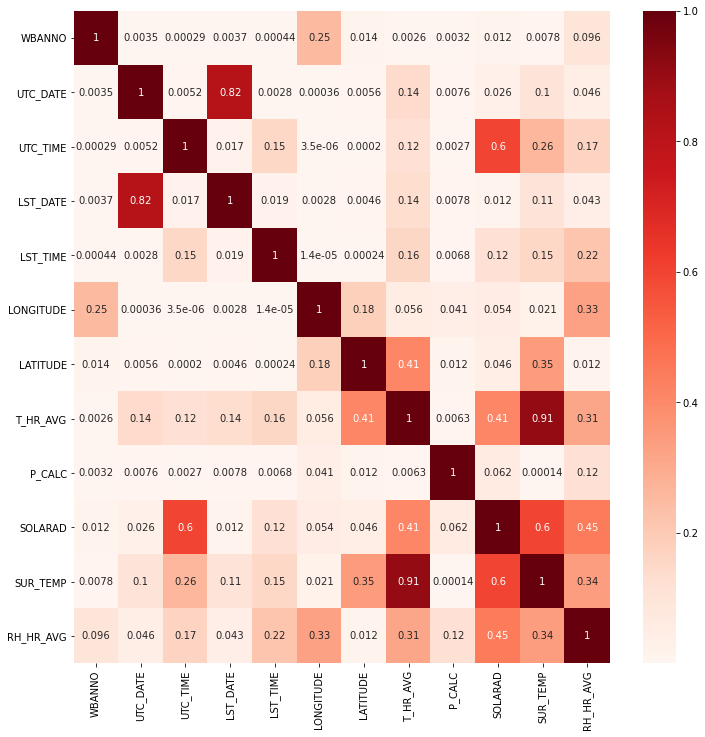

In [214]:
cor = df.corr()

plt.figure(figsize=(12,12))
sns.heatmap(cor.abs(), annot=True, cmap=plt.cm.Reds)

<AxesSubplot:xlabel='LST_TIME', ylabel='T_HR_AVG'>

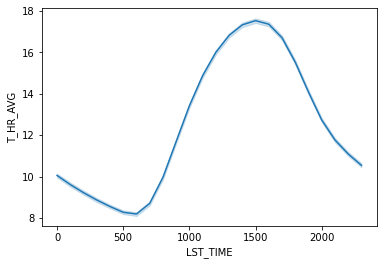

In [215]:
sns.lineplot(data=df, x="LST_TIME", y="T_HR_AVG")

<AxesSubplot:xlabel='LONGITUDE', ylabel='P_CALC'>

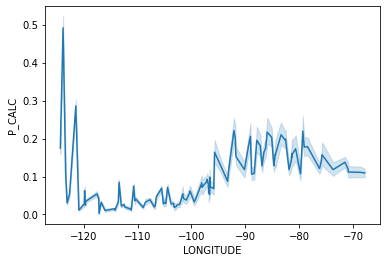

In [216]:
sns.lineplot(data=df, x="LONGITUDE", y="P_CALC")

<AxesSubplot:xlabel='LATITUDE', ylabel='P_CALC'>

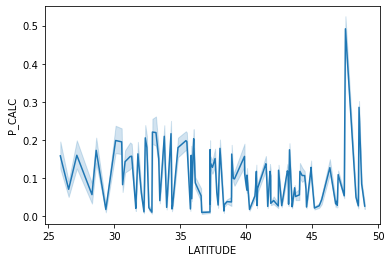

In [217]:
sns.lineplot(data=df, x="LATITUDE", y="P_CALC")

<AxesSubplot:xlabel='LATITUDE', ylabel='T_HR_AVG'>

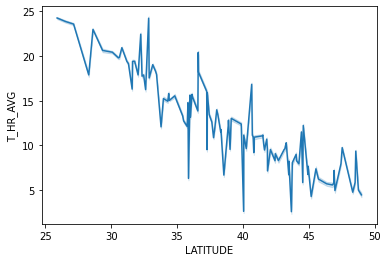

In [218]:
sns.lineplot(data=df, x="LATITUDE", y="T_HR_AVG")

<AxesSubplot:xlabel='LONGITUDE', ylabel='T_HR_AVG'>

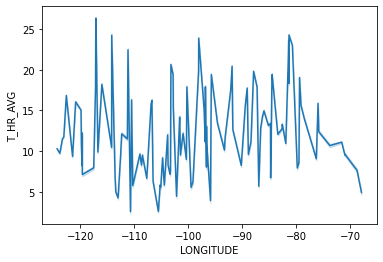

In [219]:
sns.lineplot(data=df, x="LONGITUDE", y="T_HR_AVG")

In [290]:
# feature_cols = ["LST_DATE", "LST_TIME", "T_HR_AVG", "P_CALC"]
feature_cols = [
    "UTC_DATE",
    "UTC_TIME",
    "LST_DATE",
    "LST_TIME",
    "T_HR_AVG",
    "P_CALC",
    "SOLARAD",
    "SUR_TEMP",
    "RH_HR_AVG",
]
X = df.loc[:, feature_cols]
# y = df.loc[:, "LATITUDE"]
y = df.loc[:, "LONGITUDE"]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=0)

X.shape, y.shape

((987349, 9), (987349,))

188.02061255296806
0.14674905453166331


<AxesSubplot:xlabel='T_HR_AVG', ylabel='TRUE_LATITUDE'>

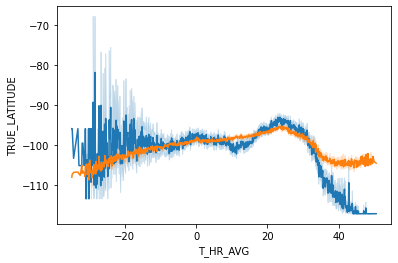

In [291]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

pipe = make_pipeline(
    StandardScaler(),
    LinearRegression()
)

pipe.fit(X_train, y_train)
print(mean_squared_error(y_valid, pipe.predict(X_valid)))
print(r2_score(y_valid, pipe.predict(X_valid)))

df_valid = pd.DataFrame({
    "TRUE_LATITUDE": y_valid,
    "PRED_LATITUDE": pipe.predict(X_valid),
    "T_HR_AVG": X_valid["T_HR_AVG"]
})

df_valid = df_valid.round(1)

sns.lineplot(data=df_valid, x="T_HR_AVG", y="TRUE_LATITUDE")
sns.lineplot(data=df_valid, x="T_HR_AVG", y="PRED_LATITUDE")

188.02060778382736
0.14674907617436384


<AxesSubplot:xlabel='T_HR_AVG', ylabel='TRUE_LATITUDE'>

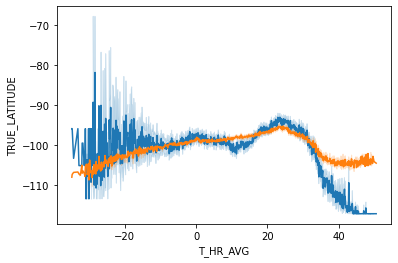

In [292]:
from sklearn.linear_model import Ridge

pipe = make_pipeline(
    StandardScaler(),
    Ridge()
)

pipe.fit(X_train, y_train)
print(mean_squared_error(y_valid, pipe.predict(X_valid)))
print(r2_score(y_valid, pipe.predict(X_valid)))

df_valid = pd.DataFrame({
    "TRUE_LATITUDE": y_valid,
    "PRED_LATITUDE": pipe.predict(X_valid),
    "T_HR_AVG": X_valid["T_HR_AVG"]
})

df_valid = df_valid.round(1)

sns.lineplot(data=df_valid, x="T_HR_AVG", y="TRUE_LATITUDE")
sns.lineplot(data=df_valid, x="T_HR_AVG", y="PRED_LATITUDE")

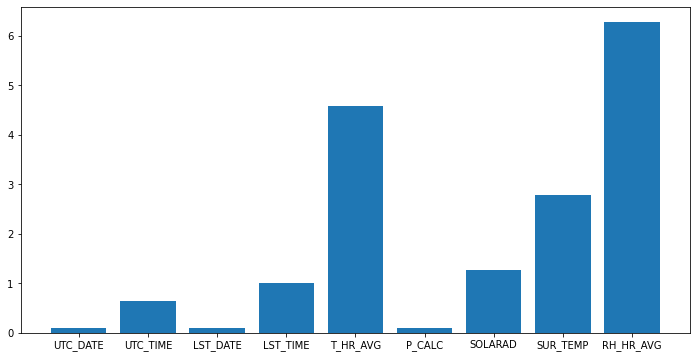

In [293]:
fig, ax = plt.subplots(figsize=(12,6))
ax.bar(x=X_train.columns.values, height=abs(pipe.named_steps["ridge"].coef_));

Iteration 1, loss = 547.73400497
Iteration 2, loss = 49.95572218
Iteration 3, loss = 33.27517594
Iteration 4, loss = 23.00376425
Iteration 5, loss = 15.08183354
Iteration 6, loss = 11.41478069
Iteration 7, loss = 10.71751744
Iteration 8, loss = 10.52312633
Iteration 9, loss = 10.39541734
Iteration 10, loss = 10.30173145


/Users/ajcd2020/.miniconda3/envs/datascience/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


20.443408619656427
0.9072263540870906


<AxesSubplot:xlabel='T_HR_AVG', ylabel='TRUE_LATITUDE'>

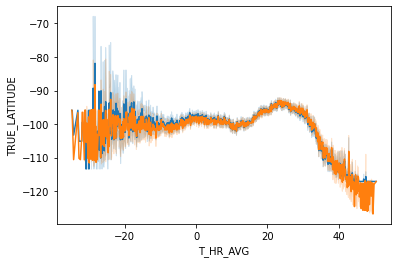

In [294]:
from sklearn.neural_network import MLPRegressor

pipe = make_pipeline(
    StandardScaler(),
    MLPRegressor(verbose=True, max_iter=10)
)

pipe.fit(X_train, y_train)
print(mean_squared_error(y_valid, pipe.predict(X_valid)))
print(r2_score(y_valid, pipe.predict(X_valid)))

df_valid = pd.DataFrame({
    "TRUE_LATITUDE": y_valid,
    "PRED_LATITUDE": pipe.predict(X_valid),
    "T_HR_AVG": X_valid["T_HR_AVG"]
})

df_valid = df_valid.round(1)

sns.lineplot(data=df_valid, x="T_HR_AVG", y="TRUE_LATITUDE")
sns.lineplot(data=df_valid, x="T_HR_AVG", y="PRED_LATITUDE")

In [295]:
from sklearn.feature_selection import RFE

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

ridge = Ridge()
rfe = RFE(estimator=ridge, n_features_to_select=1, step=1)
rfe.fit(X_train_scaled, y_train)
rfe.ranking_, rfe.support_

(array([8, 6, 9, 5, 2, 7, 4, 3, 1]),
 array([False, False, False, False, False, False, False, False,  True]))

In [296]:
df.groupby(['LATITUDE','LONGITUDE']).size().reset_index()

,LATITUDE,LONGITUDE,0
0,25.90,-81.32,8736
1,26.53,-98.06,8514
2,27.15,-81.37,7550
3,28.30,-96.82,2774
4,28.62,-80.69,8661
...,...,...,...
110,48.31,-95.87,8762
111,48.49,-105.21,8769
112,48.54,-121.45,8588
113,48.74,-113.43,8770


In [298]:
count

132